In [1]:
from sklearn.preprocessing import LabelEncoder
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn import feature_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WangHongfei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WangHongfei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WangHongfei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df=pd.read_excel('./dataset/Data_Train.xlsx')

In [3]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [4]:
df=df.rename(columns={"STORY": "text","SECTION": "target"})

In [5]:
# Preprocessing
import string
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

stop = set(stopwords.words("english"))
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

df["text"] = df.text.map(remove_URL) 
df["text"] = df.text.map(remove_punct)
df["text"] = df.text.map(remove_stopwords)

Entertaiment WordCloud


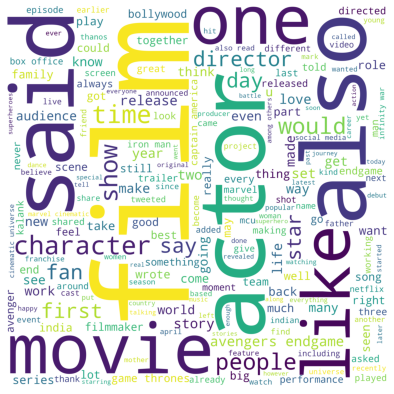

Business WordCloud


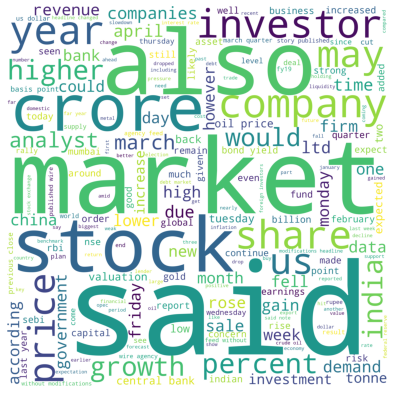

Technology WordCloud


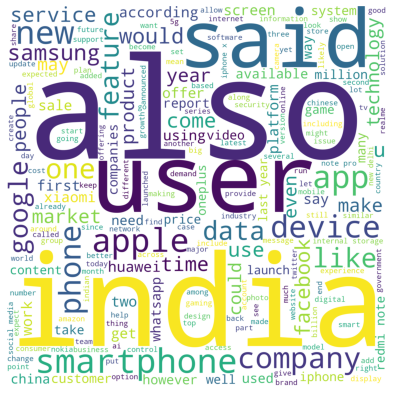

Politics WordCloud


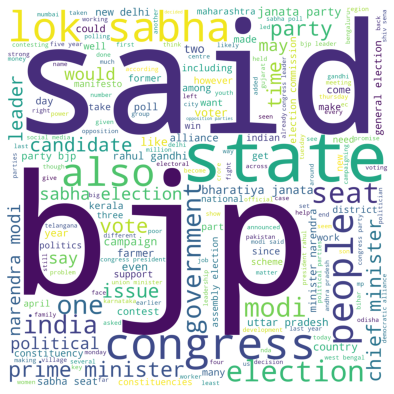

In [6]:
stop = set(stopwords.words('english'))
#Politics: 0 Technology: 1 Entertainment: 2 Business: 3
Technology = df[df['target'] == 1]
Technology = Technology['text']
Politics = df[df['target'] == 0]
Politics = Politics['text']
Business = df[df['target'] == 3]
Business = Business['text']
Entertainment = df[df['target'] == 2]
Entertainment = Entertainment['text']


def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()

    if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()
print("Entertaiment WordCloud")
wordcloud_draw(Entertainment, 'white')
print("Business WordCloud")
wordcloud_draw(Business, 'white')
print("Technology WordCloud")
wordcloud_draw(Technology, 'white')
print("Politics WordCloud")
wordcloud_draw(Politics, 'white')

In [20]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.2)
y_train = df_train["target"].values
y_test = df_test["target"].values

In [21]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [23]:
corpus = df_train["text"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [24]:
y = df_train["target"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "target":cat}))
    dtf_features = dtf_features.sort_values(["target","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\WangHongfei\AppData\Local\Temp\ipykernel_1632\2303313223.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtf_features = dtf_features.append(pd.DataFrame(
C:\Users\WangHongfei\AppData\Local\Temp\ipykernel_1632\2303313223.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtf_features = dtf_features.append(pd.DataFrame(
C:\Users\WangHongfei\AppData\Local\Temp\ipykernel_1632\2303313223.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtf_fea

In [25]:
for cat in np.unique(y):
    print("# {}:".format(cat))
    print("  . selected features:",
         len(dtf_features[dtf_features["target"]==cat]))
    print("  . top features:", ",".join(
dtf_features[dtf_features["target"]==cat]["feature"].values[:10]))
    print(" ") 

# 0:
  . selected features: 1138
  . top features: alliance,bjp,congress,election,elections,gandhi,lok,lok sabha,minister,modi
 
# 1:
  . selected features: 873
  . top features: apple,smartphone,users,google,app,samsung,pro,camera,iphone,phone
 
# 2:
  . selected features: 790
  . top features: actor,film,films,avengers,endgame,movie,character,love,star,avengers endgame
 
# 3:
  . selected features: 1076
  . top features: dollar,gold,index,investors,ltd,oil,prices,rupee,trading,currency
 


In [29]:
# Naive bayes
nb = naive_bayes.MultinomialNB()
# pipeline
model_nb = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", nb)])
# train classifier
model_nb["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text"].values
predicted_nb = model_nb.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_nb)
print("Accuracy:",  round(accuracy,4))
print("Detail:")
print(metrics.classification_report(y_test, predicted_nb))

Accuracy: 0.9784
Detail:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       325
           1       0.98      0.97      0.98       562
           2       0.98      0.98      0.98       392
           3       0.97      0.99      0.98       247

    accuracy                           0.98      1526
   macro avg       0.98      0.98      0.98      1526
weighted avg       0.98      0.98      0.98      1526



In [30]:
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
model_lgb = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", lgb_clf)])
model_lgb["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text"].values
predicted_lgb = model_lgb.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_lgb)
print("Accuracy:",  round(accuracy,4))
print("Detail:")
print(metrics.classification_report(y_test, predicted_lgb))

Accuracy: 0.922
Detail:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       325
           1       0.93      0.93      0.93       562
           2       0.86      0.96      0.91       392
           3       0.96      0.87      0.91       247

    accuracy                           0.92      1526
   macro avg       0.93      0.91      0.92      1526
weighted avg       0.92      0.92      0.92      1526



In [31]:
knn = KNeighborsClassifier(n_neighbors=6)
model_knn = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", knn)])
# train classifier
model_knn["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text"].values
predicted_knn = model_knn.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_knn)
print("Accuracy:",  round(accuracy,4))
print("Detail:")
print(metrics.classification_report(y_test, predicted_knn))

Accuracy: 0.9515
Detail:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       325
           1       0.97      0.94      0.95       562
           2       0.98      0.94      0.96       392
           3       0.93      0.96      0.94       247

    accuracy                           0.95      1526
   macro avg       0.95      0.95      0.95      1526
weighted avg       0.95      0.95      0.95      1526



In [32]:
xgb = xgboost.XGBRFClassifier(num_class=4,
                                  learning_rate=0.1,
                                  num_iterations=1000,
                                  max_depth=10,
                                  feature_fraction=0.7, 
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  metric='multiclass',
                                  eval_metric='mlogloss')
model_xgb = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", xgb)])
# train classifier
model_xgb["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text"].values
predicted_xgb = model_xgb.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_xgb)
print("Accuracy:",  round(accuracy,4))
print("Detail:")
print(metrics.classification_report(y_test, predicted_xgb))

[00:10:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boosting", "feature_fraction", "metric", "num_iterations", "scale_pos_weight" } are not used.

Accuracy: 0.8722
Detail:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       325
           1       0.79      0.96      0.87       562
           2       0.95      0.72      0.82       392
           3       0.93      0.84      0.88       247

    accuracy                           0.87      1526
   macro avg       0.90      0.86      0.88      1526
weighted avg       0.89      0.87      0.87      1526



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)

## pipeline
model_rf = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("rf", rf)])

## train classifier
model_rf["rf"].fit(X_train, y_train)
## test
X_test = df_test["text"].values
predicted_rf = model_rf.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_rf)
print("Accuracy:",  round(accuracy,4))
print("Detail:")
print(metrics.classification_report(y_test, predicted_rf))

Accuracy: 0.8355
Detail:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       325
           1       0.91      0.81      0.86       562
           2       0.68      0.94      0.79       392
           3       0.92      0.68      0.78       247

    accuracy                           0.84      1526
   macro avg       0.86      0.82      0.83      1526
weighted avg       0.86      0.84      0.84      1526



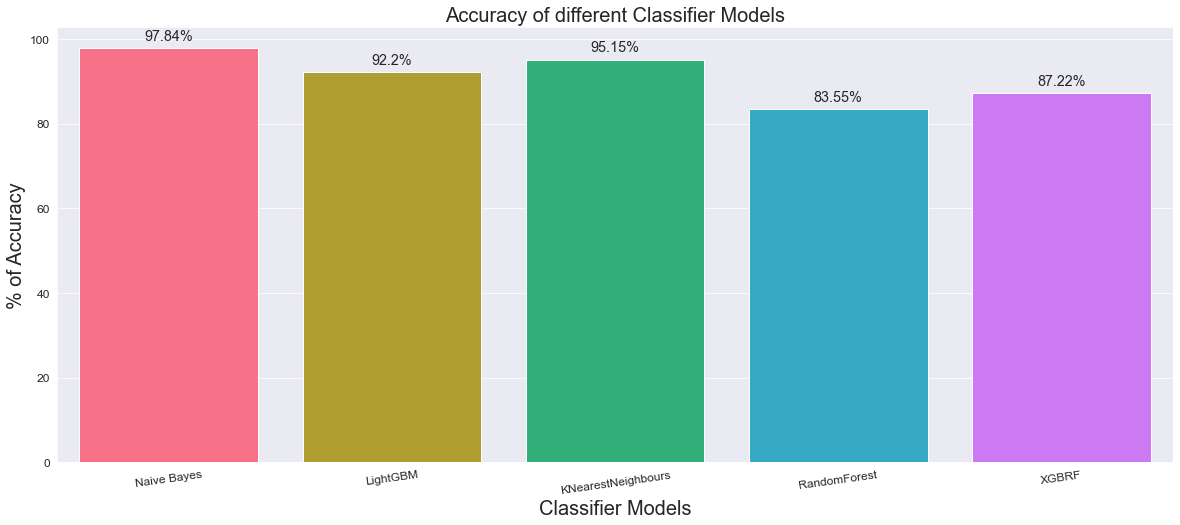

In [35]:
model_list = ['Naive Bayes', 'LightGBM','KNearestNeighbours', 'RandomForest', 'XGBRF']
accuracy_list = [(metrics.accuracy_score(y_test, predicted_nb)*100), (metrics.accuracy_score(y_test, predicted_lgb)*100), (metrics.accuracy_score(y_test, predicted_knn)*100),
               (metrics.accuracy_score(y_test, predicted_rf)*100), (metrics.accuracy_score(y_test, predicted_xgb)*100)]
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()